 ### importing data

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

office_df= pd.read_csv('the_office_series.csv')
print(office_df.head())
print(office_df.info())

   Unnamed: 0  Season   EpisodeTitle  \
0           0       1          Pilot   
1           1       1  Diversity Day   
2           2       1    Health Care   
3           3       1   The Alliance   
4           4       1     Basketball   

                                               About  Ratings  Votes  \
0  The premiere episode introduces the boss and s...      7.5   4936   
1  Michael's off color remark puts a sensitivity ...      8.3   4801   
2  Michael leaves Dwight in charge of picking the...      7.8   4024   
3  Just for a laugh, Jim agrees to an alliance wi...      8.1   3915   
4  Michael and his staff challenge the warehouse ...      8.4   4294   

   Viewership  Duration            Date GuestStars         Director  \
0        11.2        23   24 March 2005        NaN       Ken Kwapis   
1         6.0        23   29 March 2005        NaN       Ken Kwapis   
2         5.8        22    5 April 2005        NaN  Ken Whittingham   
3         5.4        23   12 April 2005   

##changing Data types and adding new columns

In [98]:
office_df = office_df.rename(columns = {'Unnamed: 0': 'Episode_Numbers'})
office_df['Date']= pd.to_datetime(office_df['Date'])
office_df['Has_Guests'] = office_df['GuestStars'].notna()

In [99]:
scaler = MinMaxScaler()
office_df[['Scaled_Ratings']] = scaler.fit_transform(office_df[['Ratings']])
office_df.head()

,Episode_Numbers,Season,EpisodeTitle,About,Ratings,Votes,Viewership,Duration,Date,GuestStars,Director,Writers,Has_Guests,Scaled_Ratings
0,0,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.2,23,2005-03-24,NaN,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels,False,0.28125
1,1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.0,23,2005-03-29,NaN,Ken Kwapis,B. J. Novak,False,0.53125
2,2,1,Health Care,Michael leaves Dwight in charge of picking the...,7.8,4024,5.8,22,2005-04-05,NaN,Ken Whittingham,Paul Lieberstein,False,0.37500
3,3,1,The Alliance,"Just for a laugh, Jim agrees to an alliance wi...",8.1,3915,5.4,23,2005-04-12,NaN,Bryan Gordon,Michael Schur,False,0.46875
4,4,1,Basketball,Michael and his staff challenge the warehouse ...,8.4,4294,5.0,23,2005-04-19,NaN,Greg Daniels,Greg Daniels,False,0.56250


### Plot using a scatter diagram to ascertain the relationship betweeen number of episode and viewership

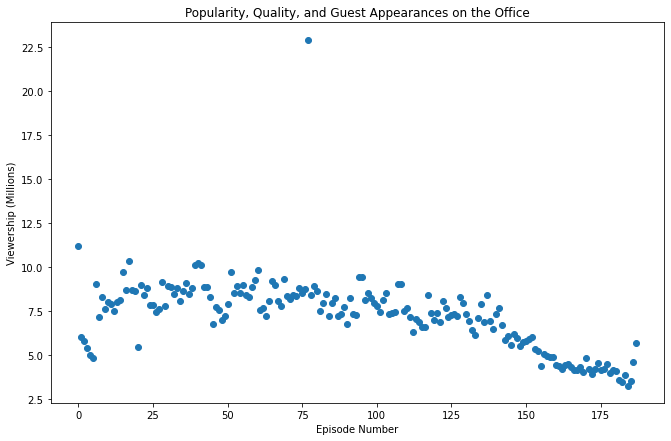

In [126]:
plt.rcParams['figure.figsize'] = [11, 7]
plt.scatter(x=office_df['Episode_Numbers'],
           y=office_df['Viewership'])
plt.title("Popularity, Quality, and Guest Appearances on the Office")
plt.xlabel("Episode Number")
plt.ylabel("Viewership (Millions)")
plt.show()

### Lets identify each episode by the scaled ratings by specfic colors using the for loop

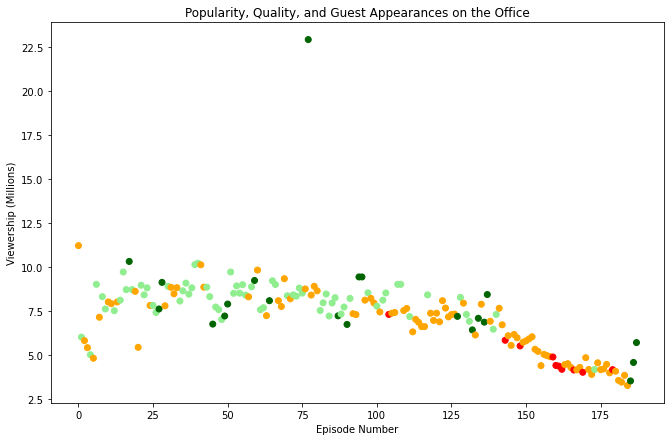

In [125]:
colours=[]
for lab, row in office_df.iterrows():
    if row["Scaled_Ratings"] < 0.25:
        colours.append("red")
    elif row["Scaled_Ratings"] < 0.5:
        colours.append("orange")
    elif row["Scaled_Ratings"] < 0.75:
        colours.append("lightgreen")
    else:
        colours.append("darkgreen")
        
plt.rcParams['figure.figsize'] = [11, 7]
plt.scatter(x=office_df['Episode_Numbers'],
           y=office_df['Viewership'],
           c=colours)
plt.title("Popularity, Quality, and Guest Appearances on the Office")
plt.xlabel("Episode Number")
plt.ylabel("Viewership (Millions)")    
plt.show()

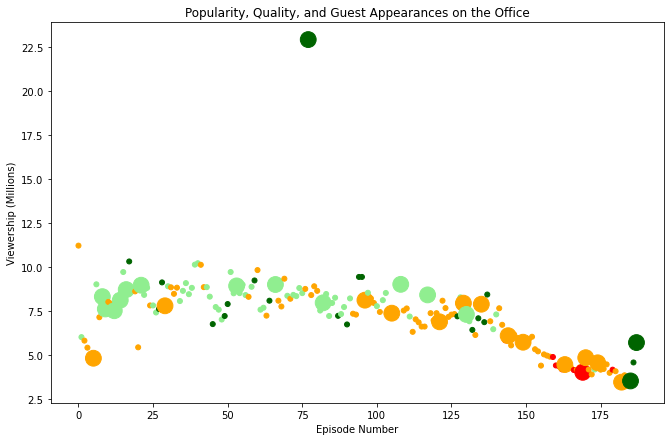

In [124]:
size=[]
for lab, row in office_df.iterrows():
    if row["Has_Guests"] == False:
        size.append(25)
    else:
        size.append(250)
        
plt.rcParams['figure.figsize'] = [11, 7]
plt.scatter(x=office_df['Episode_Numbers'],
           y=office_df['Viewership'],
           c=colours,
           s=size)
plt.title("Popularity, Quality, and Guest Appearances on the Office")
plt.xlabel("Episode Number")
plt.ylabel("Viewership (Millions)")  
plt.show()

### investigating the appearance of guest stars

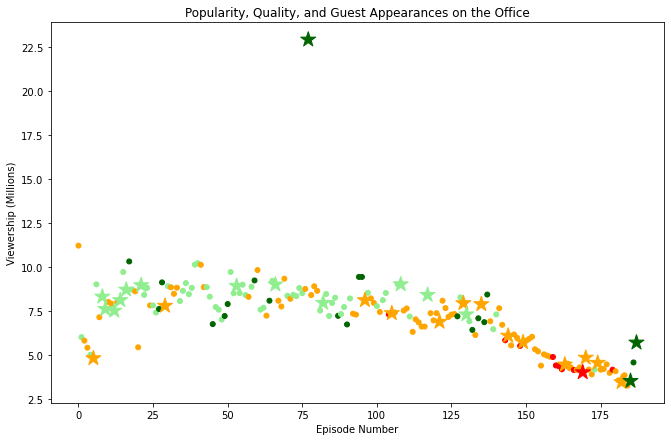

In [123]:
office_df["Colours"]= colours
office_df["Size"]= size
non_guest_df=office_df[office_df["Has_Guests"]== False]
guest_df= office_df[office_df['Has_Guests']== True]

plt.rcParams['figure.figsize'] = [11, 7]
plt.scatter(x=non_guest_df['Episode_Numbers'],
           y=non_guest_df['Viewership'],
           c=non_guest_df['Colours'],
           s=non_guest_df['Size'])

plt.scatter(x=guest_df['Episode_Numbers'],
           y=guest_df['Viewership'],
           c=guest_df['Colours'],
           s=guest_df['Size'],
           marker='*')

plt.title("Popularity, Quality, and Guest Appearances on the Office")
plt.xlabel("Episode Number")
plt.ylabel("Viewership (Millions)")                
plt.show()

In [113]:
office_df[office_df['Viewership']>20]['GuestStars']

77    Cloris Leachman, Jack Black, Jessica Alba
Name: GuestStars, dtype: object

### the relationship between ratings and viewership

Text(0, 0.5, 'Viewership (Millions)')

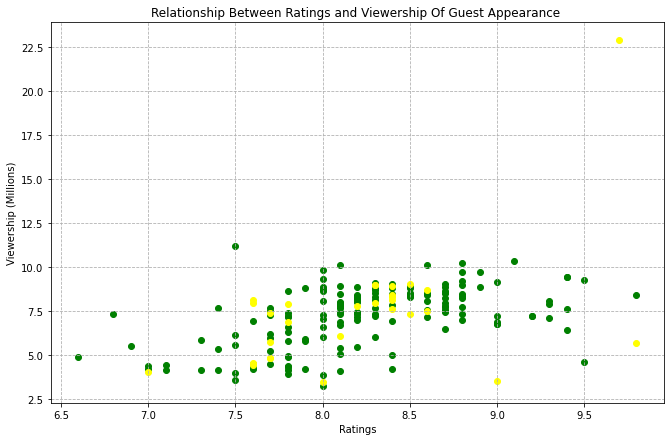

In [122]:
plt.rcParams['figure.figsize'] = [11, 7]
plt.scatter(x=non_guest_df['Ratings'],
           y=non_guest_df['Viewership'],
           color='green')

plt.scatter(x=guest_df['Ratings'],
           y=guest_df['Viewership'],
           color='yellow')
plt.grid(linestyle='--')
plt.title("Relationship Between Ratings and Viewership Of Guest Appearance ")
plt.xlabel("Ratings")
plt.ylabel("Viewership (Millions)") 
plt.show()